# Stage 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [129]:
df = df.rename(columns={'Employment Type': 'EmploymentType'})
df['AnnualIncome']=df['AnnualIncome']*190 #convert from INR to IDR

In [4]:
df.head()

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,76000000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,237500000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,95000000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,133000000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,133000000,8,1,Yes,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   EmploymentType       1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,1.772250e+08,4.752894,0.277806,0.357323
std,573.741812,2.913308,7.160258e+07,1.609650,0.448030,0.479332
min,0.000000,25.000000,5.700000e+07,2.000000,0.000000,0.000000
25%,496.500000,28.000000,1.140000e+08,4.000000,0.000000,0.000000
50%,993.000000,29.000000,1.710000e+08,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,2.375000e+08,6.000000,1.000000,1.000000
max,1986.000000,35.000000,3.420000e+08,9.000000,1.000000,1.000000


In [7]:
cat = ['EmploymentType', 'GraduateOrNot','FrequentFlyer', 'EverTravelledAbroad']

In [8]:
df[cat].describe()

,EmploymentType,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


**Observasi**
* Terdapat 1987 entries dan 10 feature
* Terdapat satu feature yaitu Unnamed: 0 yang nanti akan di drop karena hanya representasi index
* Tidak ada feature yang isinya bermasalah dilihat dari statistik deskriptif
* Feature ChronicDiseases dan TravelInsurance merupakan feature kategorikal binary

## UNIVARIATE ANALYSIS: CATEGORICAL

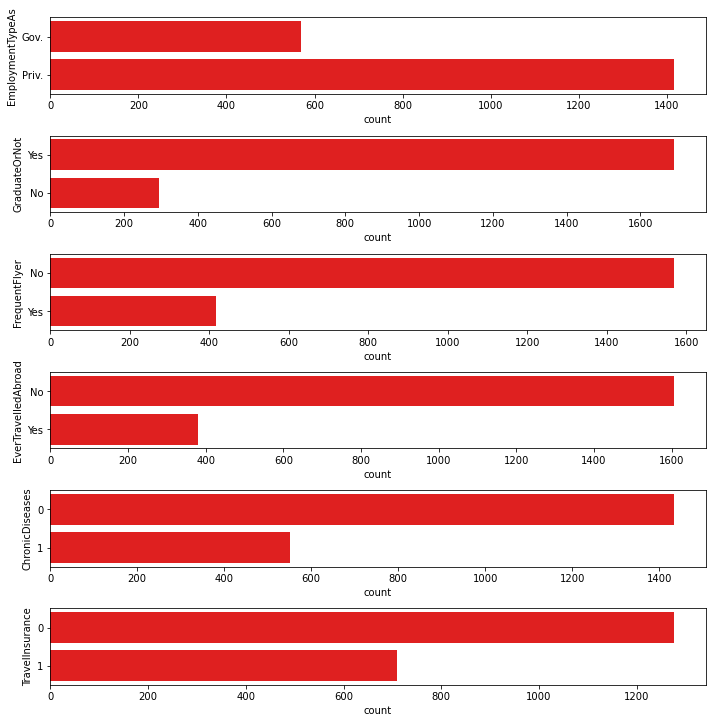

In [9]:
df['EmploymentTypeAs']=df['EmploymentType'].map({'Private Sector/Self Employed':'Priv.','Government Sector':'Gov.'})
cats = ['EmploymentTypeAs','GraduateOrNot','FrequentFlyer','EverTravelledAbroad','ChronicDiseases','TravelInsurance']
plt.figure(figsize=(10,10))
for i in range(0, len(cats)):
    plt.subplot(len(cats), 1,i+1)
    sns.countplot(y=df[cats[i]], color='red')
    plt.tight_layout()
    

In [10]:
print(df['EmploymentType'].value_counts())
print(df['GraduateOrNot'].value_counts()) 
print(df['ChronicDiseases'].value_counts())
print(df['FrequentFlyer'].value_counts())
print(df['EverTravelledAbroad'].value_counts())
print(df['TravelInsurance'].value_counts())

Private Sector/Self Employed    1417
Government Sector                570
Name: EmploymentType, dtype: int64
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64
0    1435
1     552
Name: ChronicDiseases, dtype: int64
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64
0    1277
1     710
Name: TravelInsurance, dtype: int64


In [11]:
df.drop(columns=["EmploymentTypeAs"], inplace=True)

## UNIVARIATE ANALYSIS: NUMERICAL

In [12]:
num = ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers']

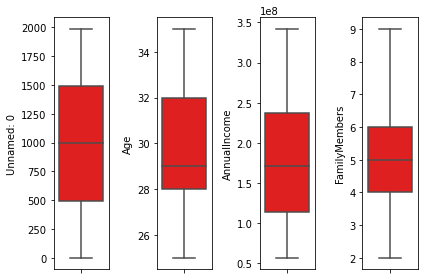

In [13]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='red', orient='v')
    plt.tight_layout()

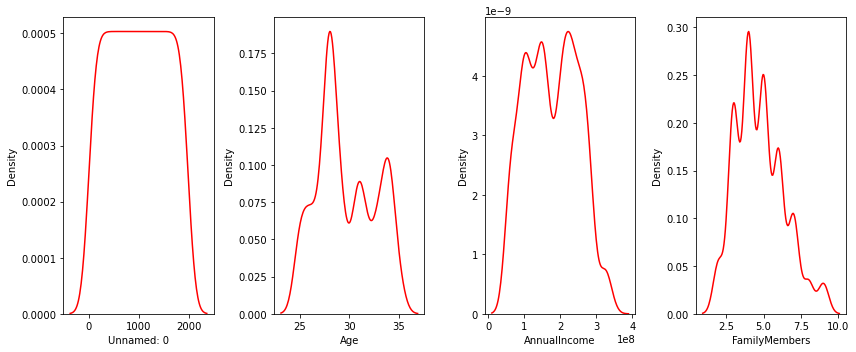

In [14]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.kdeplot(x=df[num[i]], color='red')
    plt.xlabel(num[i])
    plt.tight_layout()

In [15]:
print(df['AnnualIncome'].mode())
print(df['FamilyMembers'].mode())
print(df['Age'].mode())

0    152000000
dtype: int64
0    4
dtype: int64
0    28
dtype: int64


## BIVARIATE ANALYSIS: CATEGORICAL

In [16]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100* a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage,(x, y), size = 12)

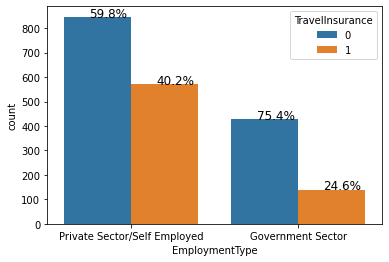

In [17]:
ax = sns.countplot(x = 'EmploymentType',hue='TravelInsurance',data=df, order=['Private Sector/Self Employed','Government Sector'])
with_hue(ax,df.EmploymentType,2,2)
plt.show()

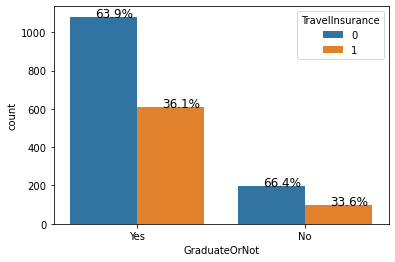

In [18]:
ax = sns.countplot(x='GraduateOrNot',hue='TravelInsurance',data=df)
with_hue(ax,df.GraduateOrNot,2,2)
plt.show()

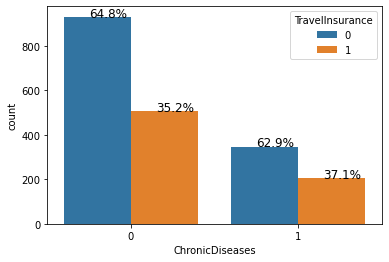

In [19]:
ax = sns.countplot(x='ChronicDiseases',hue='TravelInsurance',data=df)
with_hue(ax,df.ChronicDiseases,2,2)
plt.show()

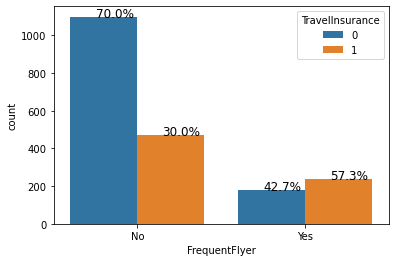

In [20]:
ax = sns.countplot(x='FrequentFlyer',hue='TravelInsurance',data=df)
with_hue(ax,df.FrequentFlyer,2,2)
plt.show()

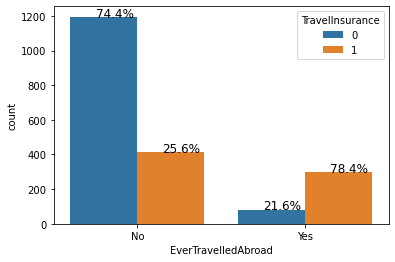

In [21]:
ax = sns.countplot(x='EverTravelledAbroad',hue='TravelInsurance',data=df)
with_hue(ax,df.EverTravelledAbroad,2,2)
plt.show()

## BIVARIATE ANALYSIS: NUMERICAL

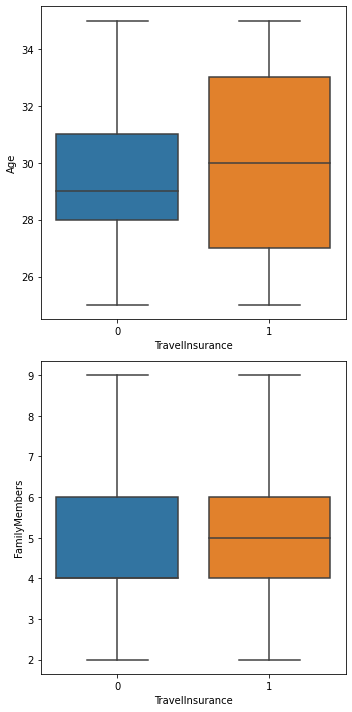

In [22]:
featnum = ['Age','FamilyMembers']
plt.figure(figsize=(5,10))
for i in range(0, len(featnum)):
    plt.subplot(len(featnum),1, i+1)
    sns.boxplot(y=df[featnum[i]], orient='v', x= df['TravelInsurance'])
    plt.tight_layout()

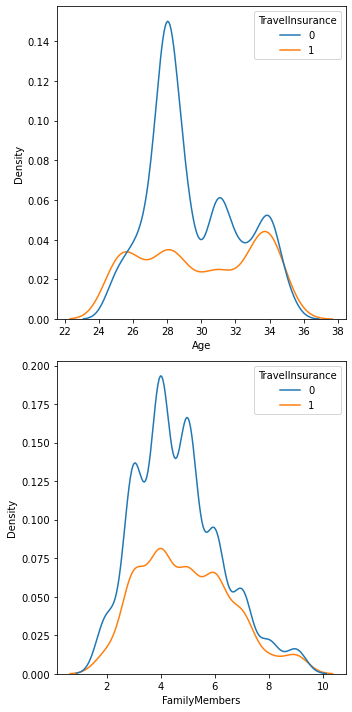

In [23]:
plt.figure(figsize=(5,10))
for i in range(0, len(featnum)):
    plt.subplot(len(featnum),1, i+1)
    sns.kdeplot(x=df[featnum[i]], hue= df['TravelInsurance'])
    plt.tight_layout()

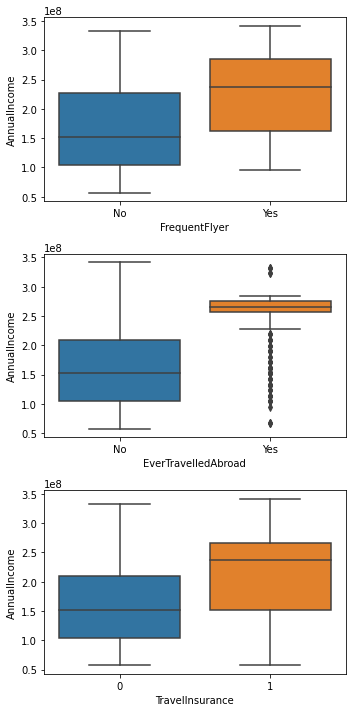

In [24]:
feat = ['FrequentFlyer','EverTravelledAbroad','TravelInsurance']
plt.figure(figsize=(5,10))
for i in range(0, len(feat)):
    plt.subplot(len(feat),1, i+1)
    sns.boxplot(x=df[feat[i]], orient='v', y= df['AnnualIncome'])
    plt.tight_layout()

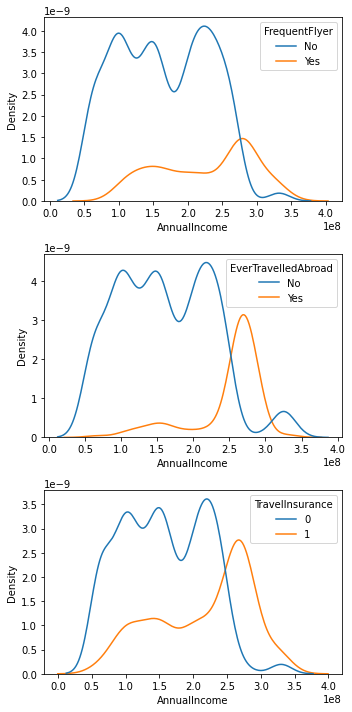

In [25]:
plt.figure(figsize=(5,10))
for i in range(0, len(feat)):
    plt.subplot(len(feat),1, i+1)
    sns.kdeplot(hue=df[feat[i]], x= df['AnnualIncome'])
    plt.tight_layout()

<AxesSubplot:>

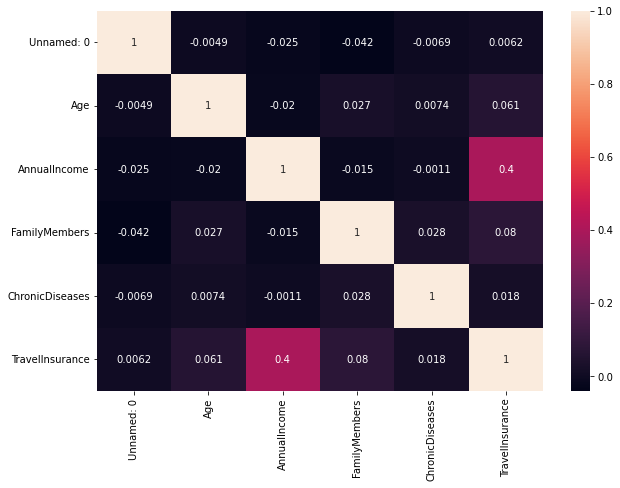

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

Dari komparasi di atas, dapat diketahui bahwa kecenderungan untuk membeli travel insurance dipengaruhi oleh pendapatan per tahun. dimana semakin tinggi pendapatan seseorang, maka orang tersebut akan cenderung membeli travel insurance. Orang-orang dengan gaji tinggi ini juga cenderung untuk lebih sering terbang, terutama ke luar negeri.
Terdapat kemungkinan lain, yaitu bisa saja harga travel insurance mahal, sehingga hanya orang-orang dengan nilai pendapatan tinggi yang mampu membeli.

Dari bivariate analysis ada beberapa insight yang dapat diambil, yaitu:
* Pada fitur **EmploymentType**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang bekerja pada Private Sector/Self Employed, berjumlah hampir 50% dari total populasi pada sektor tersebut. Sedangkan pada Government Sector, pembeli hanya sekitar 20% dari total populasi. Ini mungkin dipengaruhi oleh jumlah orang dengan pendapatan pertahun pada tiap kategori, dimana pada kategori Government Sector, populasi dengan pendapatan tinggi cenderung sedikit.
* Pada fitur **GraduateOrNot**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang punya background pendidikan. Namun, secara presentase, kedua kategori tersebut memiliki pembagian presentasi yang relatif sama antara pembeli dan non-pembeli dimana non-pembeli lebih banyak dari pembeli.
* Pada fitur **ChronicDiseases**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang tidak memiliki penyakit kronis. Sedangkan secara presentase, orang-orang dengan penyakit kronis cenderung punya kesadaran untuk membeli travel insurance meskipun tidak signifikan dilihat dari selisih antara pembeli dan non-pembeli pada kedua kategori.
* Pada fitur **FrequentFlyer**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang jarang melakukan perjalanan dengan transportasi udara. Namun, presentasenya hanya 30% dari total populasi pada kategori tersebut. Sedangkan orang-orang yang sering menggunakan transportasi udara cenderung punya kesadaran akan resiko yang diterima sehingga membeli travel insurance dilihat dari presentase pembeli yang lebih tinggi pada kategori tersebut.
* Pada fitur **EverTravelledAbroad**, diketahui bahwa orang-orang yang lebih banyak membeli travel insurance adalah orang-orang yang tidak berpergian ke luar negeri / menggunakan transportasi udara kelas domestik. Namun, pembeli hanya sekitar 25% dari total populasi pada kategori tersebut. Ini mungkin karena penerbangan domestik dirasa lebih aman dan relatif lebih dekat sehingga tidak memerlukan asuransi. Sedangkan untuk orang-orang yang sering bepergian ke luar negeri / menggunakan kelas international, mereka cenderung untuk membeli travel insurance yang mungkin atas dasar faktor resiko penerbangan yang dirasa lebih besar karena jarak yang jauh dari tempat asal serta kemungkinan-kemungkinan tidak terduga selama di negara destinasi. 
* Pada fitur **Age**, diketahui orang-orang akan cenderung membeli travel insurance ketika sudah berumur 30 tahun ke atas. Sedangkan, pengguna transportasi terbanyak sekaligus tidak membeli travel insurance berumur 28 tahun.
* Pada fitur **FamilyMembers**, diketahui bahwa semakin banyak anggota keluarga, orang-orang akan cenderung untuk membeli travel insurance. Bisa jadi karena jika liburan bersama keluarga menggunakan transportasi penerbangan, faktor resiko akan semakin besar dan berlaku untuk semua penumpang. Kemungkinan lain adalah orang-orang dengan keluarga lebih dari 5 adalah keluarga yang sudah punya pilihan untuk membeli travel insurance berdasarkan regulasi umur, sedangkan pada keluarga kecil, ada anggota keluarga dibawah umur sehingga masuk dalam kategori infant.

Dari insgiht di atas, ada beberapa rekomendasi yang bisa diajukan, yaitu:
* Dengan asumsi harga travel insurance mahal, penerapan harga premi yang variatif dengan konsep level (silver,gold,platinum) bisa dilakukan untuk menjangkau pengguna transportasi udara dengan level finansial menengah-bawah.
* Promo early bird/first flight/one way flight untuk menjangkau orang-orang yang hanya sesekali menggunakan transportasi udara.
* Promo Productive Age untuk menjangkau penumpang yang umurnya relatif muda dengan asumsi banyak karyawan muda yang terkadang melakukan perjalanan dinas mewakili manager/perusahaan.
* Penerapan family package yang variatif.
* Penerapan paket domestik yang lebih simple, tidak sebanyak konten perlindungan pada paket international dan terjangkau
* Penerapan perlindungan kesehatan plus bagi yang memiliki riwayat penyakit kronis agar dapat penanganan khusus dan intensif.

# Stage 2

## EKSPLORASI ATTRIBUTE

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   EmploymentType       1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


## CEK MISSING VALUES

In [28]:
df.isna().sum()

Unnamed: 0             0
Age                    0
EmploymentType         0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

## CEK DATA DUPLIKAT

In [29]:
df.duplicated().sum()

0

## CEK DATA BERMASALAH

In [30]:
df.head()

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,76000000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,237500000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,95000000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,133000000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,133000000,8,1,Yes,No,0


In [130]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [32]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,76000000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,237500000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,95000000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,133000000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,133000000,8,1,Yes,No,0


## HANDLING OUTLIER DATA

In [33]:
num = ['Age', 'AnnualIncome', 'FamilyMembers','ChronicDiseases','TravelInsurance']
num_cat = ['EmploymentType', 'GraduateOrNot','FrequentFlyer', 'EverTravelledAbroad']

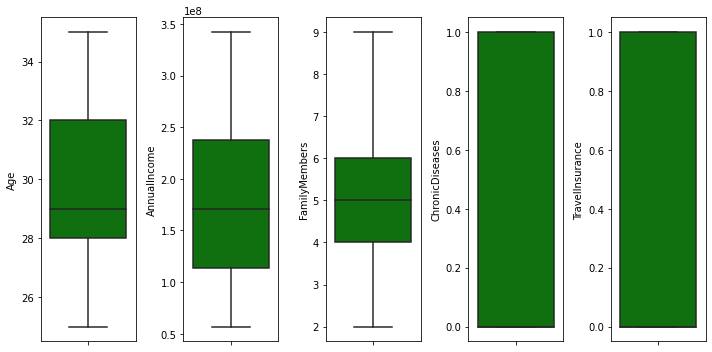

In [34]:
plt.figure(figsize=(10, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='green')
    plt.tight_layout()

## FEATURE TRANSFORMATION

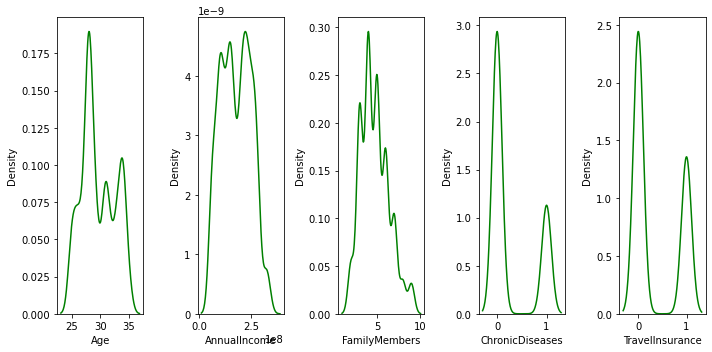

In [35]:
plt.figure(figsize=(10, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.kdeplot(x=df[num[i]], color='green')
    plt.tight_layout()

Kami akan melakukan feature transformation pada Stage 3 untuk melihat efeknya sehingga dapat ditentukan metode yang tepat

## FEATURE ENCODING

In [131]:
df['EmploymentType']=df['EmploymentType'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'Yes':1,'No':0})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'Yes':1,'No':0})

In [37]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,76000000,6,1,0,0,0
1,31,1,1,237500000,7,0,0,0,0
2,34,1,1,95000000,4,1,0,0,1
3,28,1,1,133000000,3,1,0,0,0
4,28,1,1,133000000,8,1,1,0,0


## DROP KORELASI LEMAH 

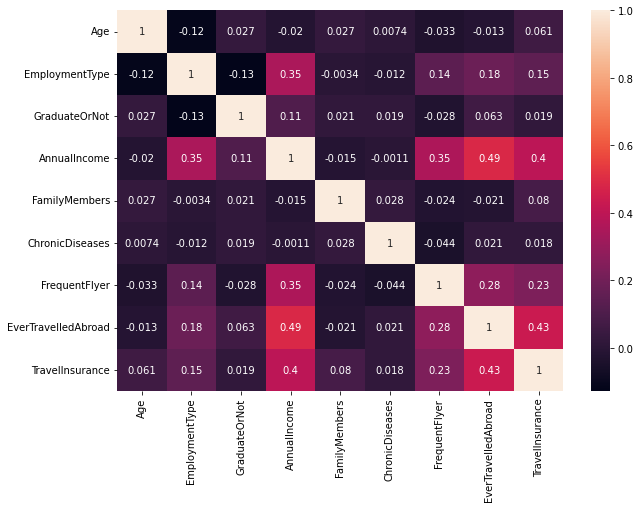

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
from scipy.stats import chi2_contingency 
age = df['Age']
et = df['EmploymentType']
gon = df['GraduateOrNot']
ai = df['AnnualIncome']
fm = df['FamilyMembers']
cd = df['ChronicDiseases']
ff = df['FrequentFlyer']
eta = df['EverTravelledAbroad']
ti = df['TravelInsurance']


In [40]:
table = pd.crosstab(ti,age)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats age %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,et)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats ET %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,gon)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats GON %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,ai)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats AI %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,fm)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats FM %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,cd)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats CD %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,ff)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats FF %0.3f p_value %0.3f' % (chi2,p))

table = pd.crosstab(ti,eta)
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square stats ETA %0.3f p_value %0.3f' % (chi2,p))

Chi-square stats age 186.880 p_value 0.000
Chi-square stats ET 42.754 p_value 0.000
Chi-square stats GON 0.606 p_value 0.436
Chi-square stats AI 638.646 p_value 0.000
Chi-square stats FM 29.115 p_value 0.000
Chi-square stats CD 0.575 p_value 0.448
Chi-square stats FF 105.857 p_value 0.000
Chi-square stats ETA 370.560 p_value 0.000


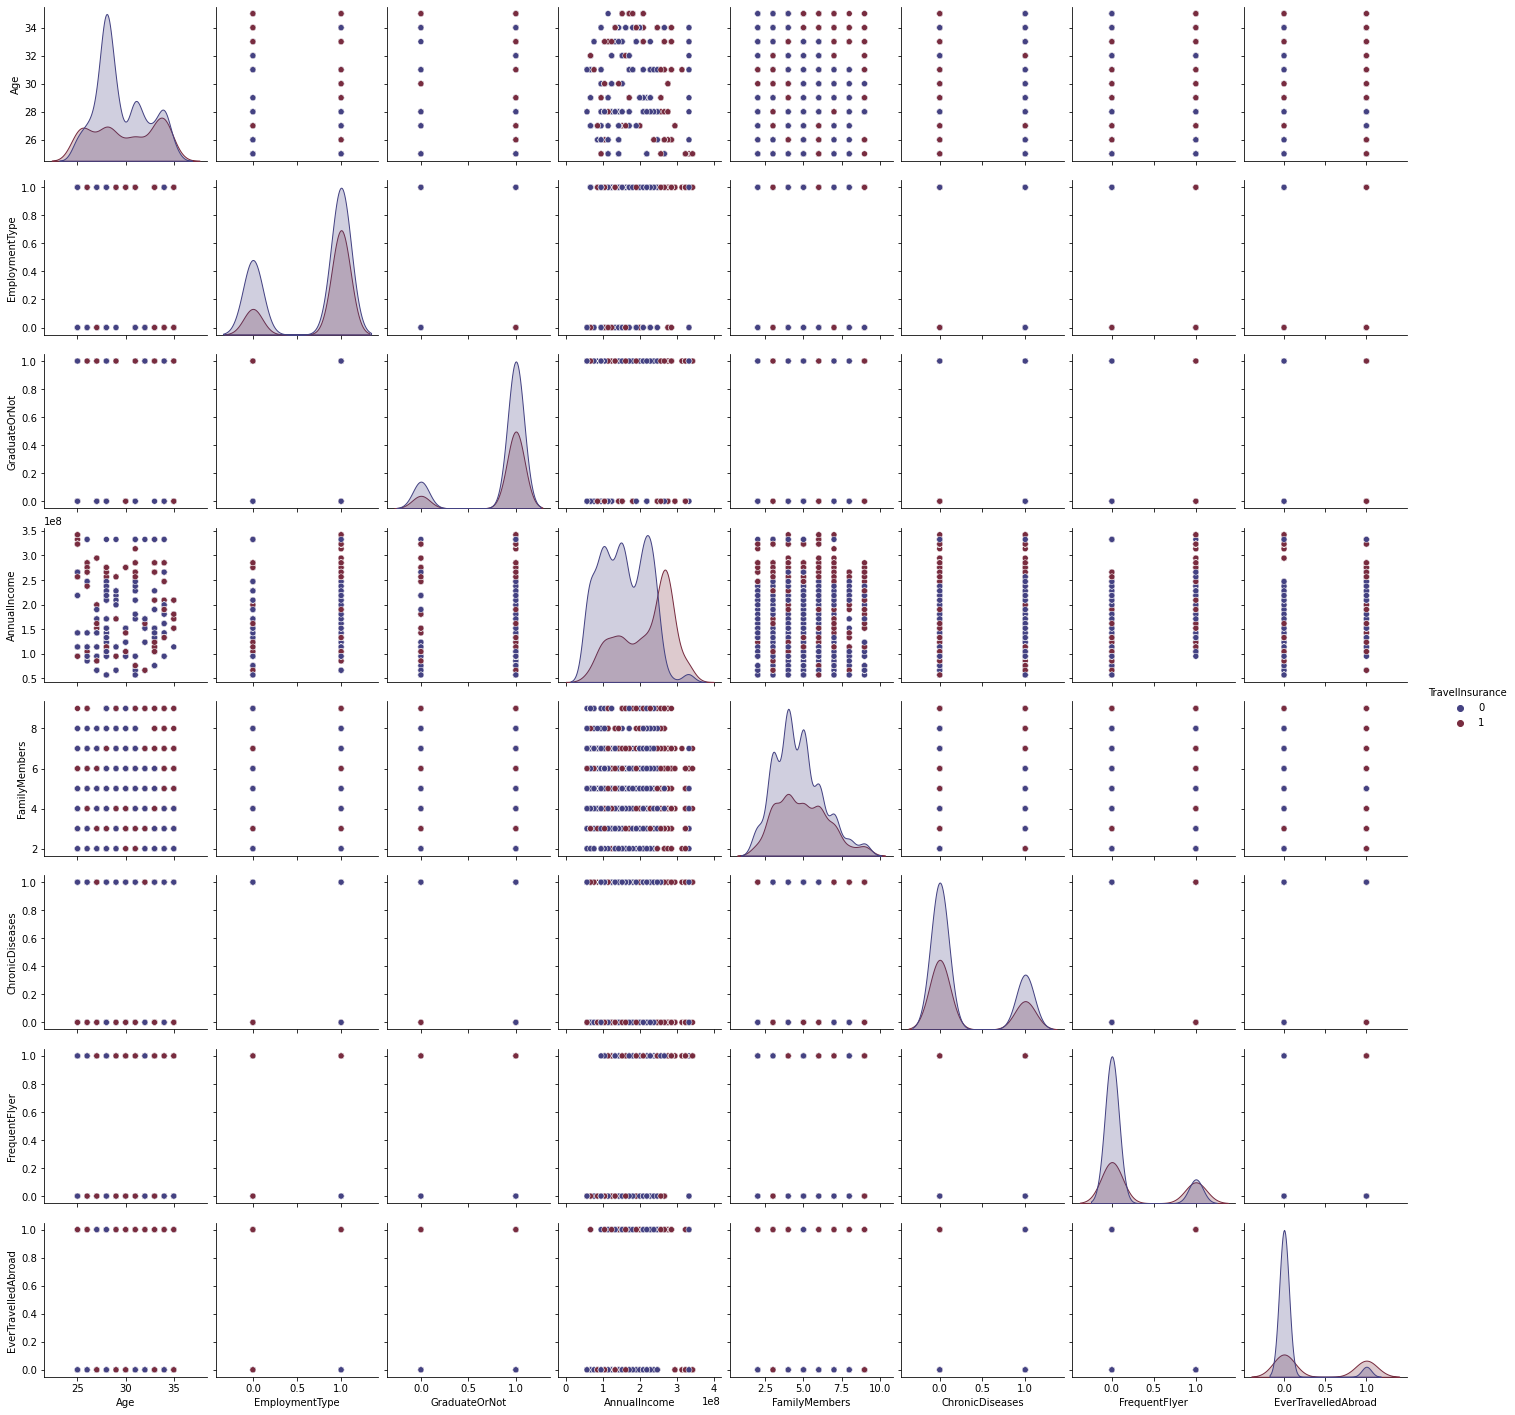

In [41]:
sns.pairplot(df,diag_kind='kde', hue ='TravelInsurance', palette ='icefire' )
plt.show()

* **AnnualIncome dan Label Travel Insurance dengan nilai 0,40.**
* **EverTravelledAbroad dan Label Travel Insurance dengan nilai 0,43.**
* **Dari heatmap diketahui ChronicDiseases dan GraduateOrNot memiliki korelasi paling kecil, begitu juga dengan Chi Square dimana keduanya memiliki P Value di atas 0.05. Namun, kami rasa kami butuh melihat lebih jauh sampai ke modelling untuk mengetahui apakah kedua fitur ini bisa di drop atau tidak.**

## HANDLING IMBALANCED DATA

In [42]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['TravelInsurance']]]
y = df['TravelInsurance']
print(X.shape)
print(y.shape)

(1987, 8)
(1987,)


In [43]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1.0).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(1.0).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1.0).fit_resample(X, y)

C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [44]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    1277
1     710
Name: TravelInsurance, dtype: int64


UNDERSAMPLING
0    710
1    710
Name: TravelInsurance, dtype: int64


OVERSAMPLING
0    1277
1    1277
Name: TravelInsurance, dtype: int64


SMOTE
0    1277
1    1277
Name: TravelInsurance, dtype: int64


# Stage 3

## Modelling Preparation

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [46]:
df.columns

Index(['Age', 'EmploymentType', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

**Pemisahan feature dan target**

In [132]:
X = df.drop(columns=["TravelInsurance"])
y = df['TravelInsurance']

**Feature Transformation dengan metode Normalizing**

In [133]:
mscale=MinMaxScaler()
mscale.fit(X)
X_scaled = mscale.transform(X)
#for shap to work
Xscaled = pd.DataFrame(data=X_scaled, columns = ['Age', 'EmploymentType', 'GraduateOrNot', 
                                                'AnnualIncome','FamilyMembers', 'ChronicDiseases', 
                                                'FrequentFlyer','EverTravelledAbroad'])

Kami sudah mencoba membandingan modelling tanpa feature transformation dan dengan feature transformatioon yaitu normalize dan standardize. Dari hasil modelling diketahui metric evaluation dan confusion matrixnya sama. Namun demikian, agar seluruh feature memiliki nilai yang seragam, kami menggunakan nomilize.

**Split Train Test**

In [134]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=42)

Kami akan menggunakan beberapa modelling yang robust terhadap data imbalance dan kategorikal. Metric evaluation yang kami gunakan adalah Recall.

## Decision Tree

### Baseline

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
import shap

In [51]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    # print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
    print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [52]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
eval_classification(model)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.77
Recall (Test Set): 0.65
Specificity (Test Set): 0.89
Avg. Recall (Test Set): 0.77
Avg. Recall (Train Set): 0.90
F1-Score (Test Set): 0.71
AUC (test-proba): 0.76
AUC (train-proba): 0.98
Train score: 0.9225928256765261
Test score:0.8090452261306532


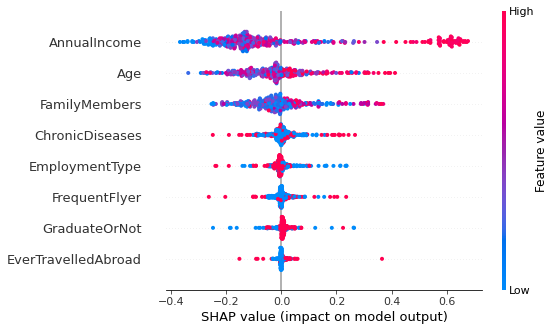

In [53]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

In [54]:
#for individual interpretation
row_to_show = 200 #change number of row here
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1,-1)
model.predict_proba(data_for_prediction_array)

array([[0.5, 0.5]])

In [55]:
#For individual interpretation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()

In [56]:
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

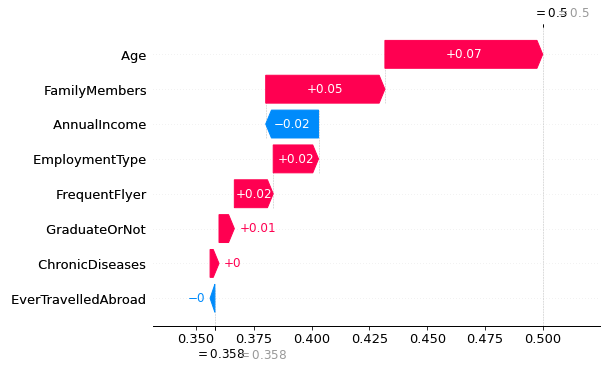

In [57]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[1],data_for_prediction)

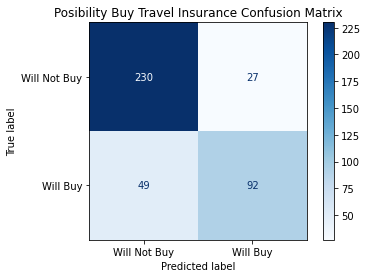

In [58]:
fig = plot_confusion_matrix(model,X_test,y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### Hyperparameter Tuning

In [59]:
max_depth = [1,2,25] # Maximum number of levels in tree
min_samples_split = [2,4,6] # Minimum number of samples required to split a node
min_samples_leaf = [2,4,6,8] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)
eval_classification(model)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.72
Recall (Test Set): 0.60
Specificity (Test Set): 0.88
Avg. Recall (Test Set): 0.74
Avg. Recall (Train Set): 0.79
F1-Score (Test Set): 0.65
AUC (test-proba): 0.77
AUC (train-proba): 0.87
Train score: 0.7633587786259542
Test score:0.7241379310344828


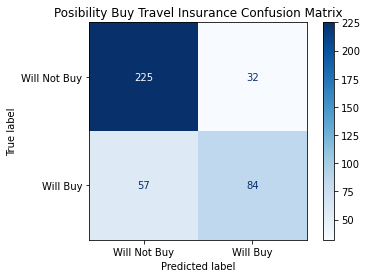

In [60]:
fig = plot_confusion_matrix(model,X_test,y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

Terlihat terjadi kenaikan angka Recall pada baseline setelah di hyperparameter tuning namun tidak signifikan

### Balancing

In [61]:
rus = RandomUnderSampler(random_state = 42)
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

In [62]:
def eval_classification_under(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_under_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_under_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_under_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_under_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_under_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_under_train, y_under_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_over(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_over_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_over_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_over_train, y_over_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_smote(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_smote_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_smote_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_smote_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_smote_train, y_pred_train,pos_label=0)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_smote_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_smote_train, y_smote_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy

#### Undersampling

In [63]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_under_train,y_under_train)
eval_classification_under(model)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.64
Recall (Test Set): 0.71
Specificity (Test Set): 0.78
Avg. Recall (Test Set): 0.74
Avg. Recall (Train Set): 0.93
F1-Score (Test Set): 0.67
AUC (test-proba): 0.75
AUC (train-proba): 0.99
Train score: 0.9253075571177505
Test score:0.7537688442211056


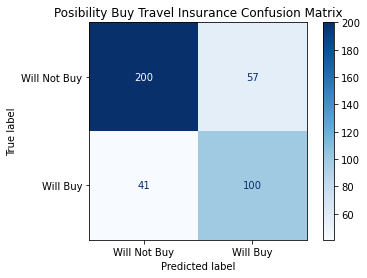

In [64]:
fig = plot_confusion_matrix(model,X_test,y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

##### Hyperparameter Tuning

In [65]:
max_depth = [2,4,13] # Maximum number of levels in tree
min_samples_split = [2] # Minimum number of samples required to split a node
min_samples_leaf = [2,4,6,8] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_under_train, y_under_train)
eval_classification_under(model)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.77
Recall (Test Set): 0.70
Specificity (Test Set): 0.89
Avg. Recall (Test Set): 0.79
Avg. Recall (Train Set): 0.80
F1-Score (Test Set): 0.74
AUC (test-proba): 0.83
AUC (train-proba): 0.87
Train score: 0.7135325131810193
Test score:0.7021276595744681


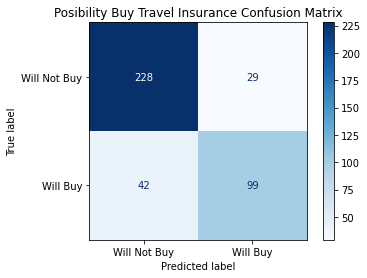

In [66]:
fig = plot_confusion_matrix(model,X_test,y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

In [67]:
show_best_hyperparameter(model)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


#### Oversampling

In [68]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_over_train,y_over_train)
eval_classification_over(model)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.67
Recall (Test Set): 0.65
Specificity (Test Set): 0.82
Avg. Recall (Test Set): 0.74
Avg. Recall (Train Set): 0.92
F1-Score (Test Set): 0.66
AUC (test-proba): 0.75
AUC (train-proba): 0.99
Train score: 0.9235294117647059
Test score:0.7613065326633166


##### Hyperparameter Tuning

In [69]:
max_depth = [2,4,15] # Maximum number of levels in tree
min_samples_split = [2,4,6] # Minimum number of samples required to split a node
min_samples_leaf = [2,4,6] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_over_train, y_over_train)
eval_classification_over(model)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.73
Recall (Test Set): 0.66
Specificity (Test Set): 0.87
Avg. Recall (Test Set): 0.76
Avg. Recall (Train Set): 0.83
F1-Score (Test Set): 0.69
AUC (test-proba): 0.79
AUC (train-proba): 0.92
Train score: 0.7558823529411764
Test score:0.6595744680851063


#### SMOTE

In [70]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_smote_train,y_smote_train)
eval_classification_smote(model)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.73
Recall (Test Set): 0.65
Specificity (Test Set): 0.87
Avg. Recall (Test Set): 0.76
Avg. Recall (Train Set): 0.94
F1-Score (Test Set): 0.68
AUC (test-proba): 0.74
AUC (train-proba): 0.99
Train score: 0.9377450980392157
Test score:0.7889447236180904


##### Hyperparameter Tuning

In [71]:
max_depth = [int(x) for x in np.linspace(1, 100, num = 15)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 100, num = 100)] # Minimum number of samples required to split a node
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 100, num = 100)] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_smote_train, y_smote_train)
eval_classification_smote(model)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.58
Recall (Test Set): 0.60
Specificity (Test Set): 0.76
Avg. Recall (Test Set): 0.68
Avg. Recall (Train Set): 0.73
F1-Score (Test Set): 0.59
AUC (test-proba): 0.75
AUC (train-proba): 0.80
Train score: 0.7527472527472527
Test score:0.5782312925170068


### Feature Selection (optional)

In [72]:
show_feature_importance(model)

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

In [ ]:
X = df[['AnnualIncome','FamilyMembers','Age']]
y = df[['TravelInsurance']]

In [ ]:
mscale=MinMaxScaler()
mscale.fit(X)
X_scaled = mscale.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Baseline

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
eval_classification(model)

In [ ]:
fig = plot_confusion_matrix(model,X_test,y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### Hyperparameter Tuning

In [ ]:
max_depth = [1,2,25] # Maximum number of levels in tree
min_samples_split = [2,4,6,8] # Minimum number of samples required to split a node
min_samples_leaf = [2,4,6,8] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_train, y_train)
eval_classification(model)

#### Balancing

In [ ]:
rus = RandomUnderSampler(random_state = 42)
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

##### Undersampling

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_under_train,y_under_train)
eval_classification_under(model)

##### Hyperparameter Tuning

In [ ]:
max_depth = [2,4,20] # Maximum number of levels in tree
min_samples_split = [2,4,6,20] # Minimum number of samples required to split a node
min_samples_leaf = [2,4,6,20] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_under_train, y_under_train)
eval_classification_under(model)

##### Oversampling

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_over_train,y_over_train)
eval_classification_over(model)

##### Hyperparameter Tuning

In [ ]:
max_depth = [2,4,15] # Maximum number of levels in tree
min_samples_split = [2,4,6] # Minimum number of samples required to split a node
min_samples_leaf = [2,4,6] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_over_train, y_over_train)
eval_classification_over(model)

##### SMOTE

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_smote_train,y_smote_train)
eval_classification_smote(model)

In [ ]:
max_depth = [int(x) for x in np.linspace(1, 100, num = 15)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 100, num = 100)] # Minimum number of samples required to split a node
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 100, num = 100)] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_smote_train, y_smote_train)
eval_classification_smote(model)

Kami mencoba membuang fitur-fitur dengan score kurang dari 0.1 seperti terlihat di feature importance, namun tidak ada yang menghasilkan nilai Recall lebih tinggi dari 0.70

## Random Forest Classifier

### (Optional for Feature Selection)

In [ ]:
# X = df.drop(columns=["TravelInsurance",'ChronicDiseases','GraduateOrNot','EmploymentType','FamilyMembers'])
# y = df['TravelInsurance']

In [ ]:
# mscale=MinMaxScaler()
# mscale.fit(X)
# X_scaled = mscale.transform(X)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Baseline

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    # print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
    print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [75]:
model = RandomForestClassifier(max_depth=2,random_state=42)
model.fit(X_train, y_train)
eval_classification(model)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.98
Recall (Test Set): 0.45
Specificity (Test Set): 1.00
Avg. Recall (Test Set): 0.72
Avg. Recall (Train Set): 0.71
F1-Score (Test Set): 0.61
AUC (test-proba): 0.79
AUC (train-proba): 0.79
Train score: 0.789175582127124
Test score:0.8015075376884422


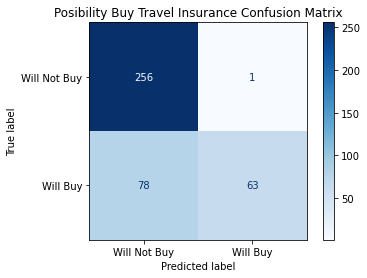

In [76]:
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

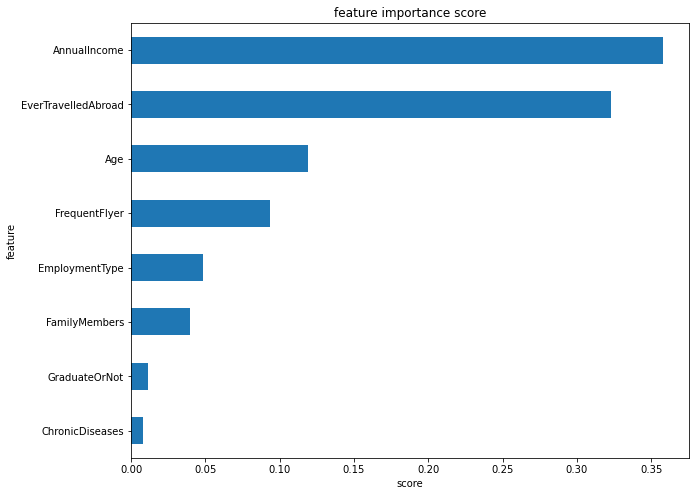

In [77]:
show_feature_importance(model)

#### Hyperparameter Tuning

In [78]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier(max_depth=2,random_state=42)
model = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring='precision')
model.fit(X_train, y_train)
eval_classification(model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy (Test Set): 0.84
Precision (Test Set): 0.99
Recall (Test Set): 0.57
Specificity (Test Set): 1.00
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.78
F1-Score (Test Set): 0.72
AUC (test-proba): 0.80
AUC (train-proba): 0.92
Train score: 0.9074074074074074
Test score:0.9876543209876543


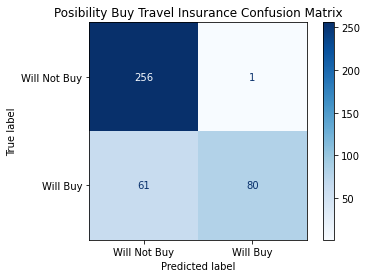

In [79]:
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

### Balancing

In [80]:
rus = RandomUnderSampler(random_state = 42)
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

In [81]:
def eval_classification_under(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_under_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_under_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_under_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_under_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_under_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_under_train, y_under_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_over(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_over_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_over_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_over_train, y_over_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_smote(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_smote_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_smote_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_smote_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_smote_train, y_pred_train,pos_label=0)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_smote_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_smote_train, y_smote_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy

#### Undersampling

In [82]:
model = RandomForestClassifier(max_depth=2,random_state=42)
model.fit(X_under_train, y_under_train)
eval_classification_under(model)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.77
Recall (Test Set): 0.50
Specificity (Test Set): 0.92
Avg. Recall (Test Set): 0.71
Avg. Recall (Train Set): 0.71
F1-Score (Test Set): 0.60
AUC (test-proba): 0.79
AUC (train-proba): 0.79
Train score: 0.7126537785588752
Test score:0.7688442211055276


##### Hyperparameter Tuning

In [83]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier(max_depth=2,random_state=42)
model = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring='precision')
model.fit(X_under_train, y_under_train)
eval_classification_under(model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy (Test Set): 0.83
Precision (Test Set): 0.85
Recall (Test Set): 0.62
Specificity (Test Set): 0.94
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.82
F1-Score (Test Set): 0.72
AUC (test-proba): 0.79
AUC (train-proba): 0.92
Train score: 0.9397590361445783
Test score:0.8529411764705882


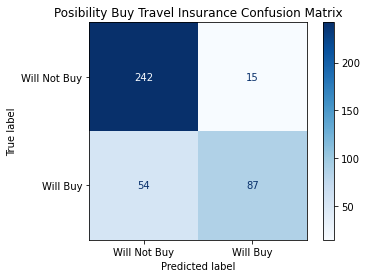

In [84]:
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### Oversampling

In [85]:
model = RandomForestClassifier(max_depth=2,random_state=42)
model.fit(X_over_train, y_over_train)
eval_classification_over(model)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.77
Recall (Test Set): 0.50
Specificity (Test Set): 0.92
Avg. Recall (Test Set): 0.71
Avg. Recall (Train Set): 0.71
F1-Score (Test Set): 0.61
AUC (test-proba): 0.79
AUC (train-proba): 0.79
Train score: 0.7068627450980393
Test score:0.7713567839195979


##### Hyperparametertuning

In [86]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier(max_depth=2,random_state=42)
model = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring='precision')
model.fit(X_over_train, y_over_train)
eval_classification_over(model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy (Test Set): 0.83
Precision (Test Set): 0.90
Recall (Test Set): 0.60
Specificity (Test Set): 0.96
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.83
F1-Score (Test Set): 0.72
AUC (test-proba): 0.80
AUC (train-proba): 0.94
Train score: 0.9358638743455497
Test score:0.9032258064516129


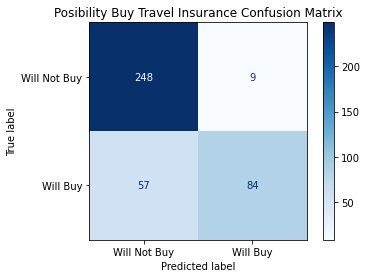

In [87]:
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### SMOTE

In [88]:
model = RandomForestClassifier(max_depth=2,random_state=42)
model.fit(X_smote_train, y_smote_train)
eval_classification_smote(model)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.77
Recall (Test Set): 0.50
Specificity (Test Set): 0.92
Avg. Recall (Test Set): 0.71
Avg. Recall (Train Set): 0.70
F1-Score (Test Set): 0.60
AUC (test-proba): 0.79
AUC (train-proba): 0.80
Train score: 0.7049019607843138
Test score:0.7688442211055276


##### Hyperparameter Tuning

In [89]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier(max_depth=2,random_state=42)
model = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring='precision')
model.fit(X_smote_train, y_smote_train)
eval_classification_smote(model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy (Test Set): 0.84
Precision (Test Set): 0.96
Recall (Test Set): 0.57
Specificity (Test Set): 0.99
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.84
F1-Score (Test Set): 0.72
AUC (test-proba): 0.80
AUC (train-proba): 0.94
Train score: 0.9497422680412371
Test score:0.9642857142857143


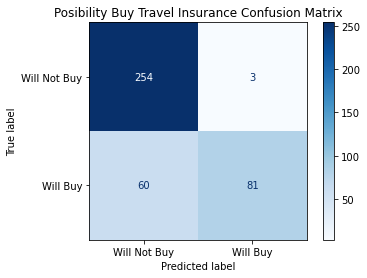

In [90]:
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

## CatBoost Classifier

### Model Preparation

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_train, y_pred_train,pos_label=0)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    # print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
    print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [92]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [93]:
df = df.rename(columns={'Employment Type': 'EmploymentType'})

In [94]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [95]:
df['EmploymentType']=df['EmploymentType'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'Yes':1,'No':0})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'Yes':1,'No':0})

In [96]:
cat = ['EmploymentType','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']

In [97]:
df['TravelInsurance'].value_counts(normalize=True)

0    0.642677
1    0.357323
Name: TravelInsurance, dtype: float64

In [ ]:
#Optional if we want to know imbalancing effect with class_weights parameter
w1 = df['TravelInsurance'].value_counts(normalize=True)[0]
w2 = df['TravelInsurance'].value_counts(normalize=True)[1]

In [98]:
#Optional experiment only for continuous numerical features 
#log
# df['AnnualIncome'] = np.log(df['AnnualIncome'])
# df['Age'] = np.log(df['Age'])
# df['FamilyMembers'] = np.log(df['FamilyMembers'])

#normalize - CatBoost can't read transformed X variable because of it need to have integer value
df['AnnualIncomeScaled'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df), 1))
df['AgeScaled'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df),1))
df['FamilyMembersScaled'] = MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df),1))

#P.S - Nothing was affected by this but we'll use normalizing anyway 

df = df.drop(columns=['AnnualIncome', 'Age', 'FamilyMembers'])

In [99]:
df.rename(columns={'AnnualIncomeScaled':'AnnualIncome','AgeScaled':'Age','FamilyMembersScaled':'FamilyMembers'}, inplace=True)

In [100]:
X = df.drop(columns=["TravelInsurance"])
y = df['TravelInsurance']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline

In [102]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(depth = 4, random_seed = 42,
                           learning_rate = 0.01,
                           # class_weights = [w1,w2],
                           auto_class_weights = 'Balanced', 
                           cat_features = cat,
                           eval_metric='Recall',
                           od_type = 'Iter',
                           od_wait = 20, verbose = 200
                           )
model.fit(X_train,y_train)
eval_classification(model)

0:	learn: 0.4481547	total: 149ms	remaining: 2m 28s
200:	learn: 0.6045694	total: 403ms	remaining: 1.6s
400:	learn: 0.6168717	total: 610ms	remaining: 911ms
600:	learn: 0.6186292	total: 830ms	remaining: 551ms
800:	learn: 0.6203866	total: 1.05s	remaining: 262ms
999:	learn: 0.6326889	total: 1.33s	remaining: 0us
Accuracy (Test Set): 0.83
Precision (Test Set): 0.92
Recall (Test Set): 0.58
Specificity (Test Set): 0.97
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.79
F1-Score (Test Set): 0.71
AUC (test-proba): 0.81
AUC (train-proba): 0.89
Train score: 0.8407803650094399
Test score:0.8341708542713567


In [103]:
import shap
from catboost import CatBoostClassifier, Pool
shap_values=model.get_feature_importance(Pool(X_test, label=y_test, cat_features = cat),
                                         type='ShapValues')
expected_value=shap_values[0,-1]
shap_values=shap_values[:,:-1]
shap.initjs()

In [104]:
shap.force_plot(expected_value, shap_values[21,:], X_test.iloc[21,:])

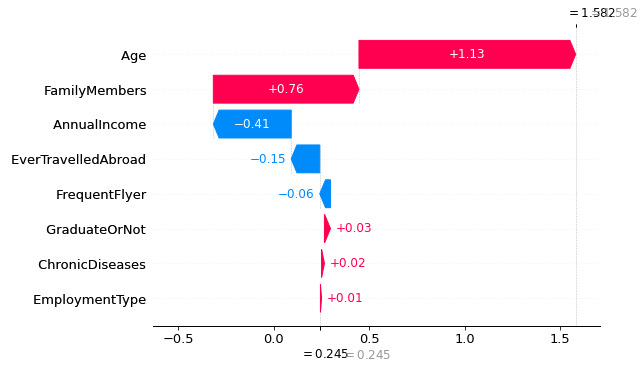

In [105]:
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[21,:], X_test.iloc[21,:])

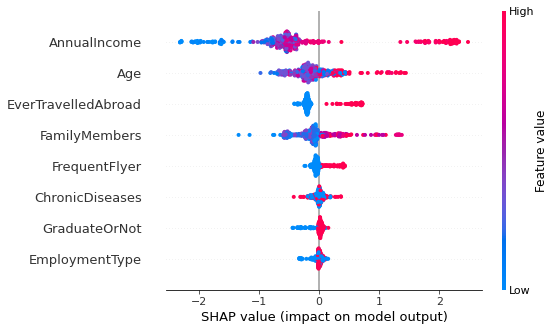

In [106]:
shap.summary_plot(shap_values, X_test)

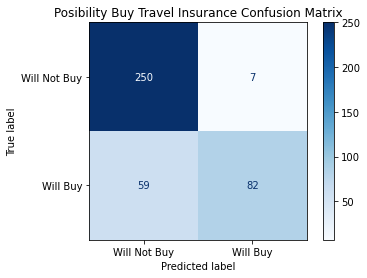

In [107]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

### Balancing

In [108]:
def eval_classification_under(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_under_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_under_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_under_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_under_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_under_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_under_train, y_under_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_over(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_over_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_over_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_over_train, y_over_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_smote(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_smote_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_smote_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_smote_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_smote_train, y_pred_train,pos_label=0)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_smote_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_smote_train, y_smote_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy

In [109]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
rus = RandomUnderSampler(random_state = 42)
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

#### Undersampling

In [110]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(depth = 3, random_seed = 42,
                           learning_rate = 0.01,
                           # class_weights = [w1,w2],
                           #auto_class_weights = 'Balanced', 
                           cat_features = cat,
                           eval_metric='Recall',
                           od_type = 'Iter',
                           od_wait = 20, verbose = 200
                           )
model.fit(X_under_train, y_under_train)

eval_classification_under(model)

0:	learn: 0.5623902	total: 1.82ms	remaining: 1.82s
200:	learn: 0.6028120	total: 190ms	remaining: 756ms
400:	learn: 0.6063269	total: 365ms	remaining: 545ms
600:	learn: 0.6080844	total: 530ms	remaining: 352ms
800:	learn: 0.6151142	total: 688ms	remaining: 171ms
999:	learn: 0.6168717	total: 870ms	remaining: 0us
Accuracy (Test Set): 0.84
Precision (Test Set): 0.98
Recall (Test Set): 0.57
Specificity (Test Set): 0.99
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.79
F1-Score (Test Set): 0.72
AUC (test-proba): 0.80
AUC (train-proba): 0.88
Train score: 0.789103690685413
Test score:0.8442211055276382


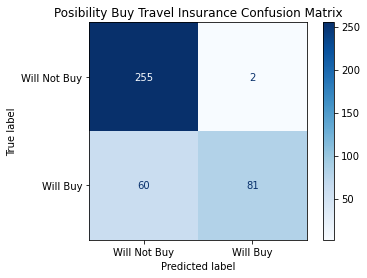

In [111]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### Oversampling

In [112]:
model = CatBoostClassifier(depth = 4, random_seed = 42,
                           learning_rate = 0.01,
                           # class_weights = [w1,w2],
                           #auto_class_weights = 'Balanced', 
                           cat_features = cat,
                           eval_metric='Precision',
                           od_type = 'Iter',
                           od_wait = 20, verbose = 200
                           )
model.fit(X_over_train, y_over_train)

eval_classification_over(model)

0:	learn: 0.7232960	total: 4.21ms	remaining: 4.21s
200:	learn: 0.9322289	total: 276ms	remaining: 1.1s
400:	learn: 0.9398496	total: 528ms	remaining: 788ms
600:	learn: 0.9445277	total: 788ms	remaining: 523ms
800:	learn: 0.9368723	total: 1.05s	remaining: 260ms
999:	learn: 0.9380282	total: 1.32s	remaining: 0us
Accuracy (Test Set): 0.83
Precision (Test Set): 0.91
Recall (Test Set): 0.58
Specificity (Test Set): 0.97
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.80
F1-Score (Test Set): 0.71
AUC (test-proba): 0.81
AUC (train-proba): 0.91
Train score: 0.8049019607843138
Test score:0.8316582914572864


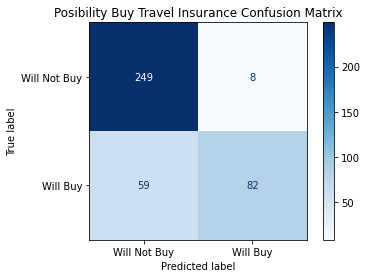

In [113]:
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### SMOTE

In [114]:
model = CatBoostClassifier(depth = 1, random_seed = 42,
                           learning_rate = 0.01,
                           # class_weights = [w1,w2],
                           #auto_class_weights = 'Balanced', 
                           cat_features = cat,
                           eval_metric='Recall',
                           od_type = 'Iter',
                           od_wait = 20, verbose = 200
                           )
model.fit(X_smote_train, y_smote_train)

eval_classification_smote(model)

0:	learn: 0.4470588	total: 1.84ms	remaining: 1.84s
200:	learn: 0.4852941	total: 167ms	remaining: 664ms
400:	learn: 0.6078431	total: 328ms	remaining: 490ms
600:	learn: 0.6127451	total: 472ms	remaining: 313ms
800:	learn: 0.6166667	total: 629ms	remaining: 156ms
999:	learn: 0.6186275	total: 774ms	remaining: 0us
Accuracy (Test Set): 0.81
Precision (Test Set): 0.83
Recall (Test Set): 0.60
Specificity (Test Set): 0.93
Avg. Recall (Test Set): 0.77
Avg. Recall (Train Set): 0.77
F1-Score (Test Set): 0.70
AUC (test-proba): 0.79
AUC (train-proba): 0.81
Train score: 0.7666666666666667
Test score:0.8140703517587939


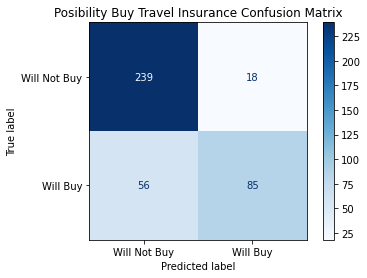

In [115]:
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

## AdaBoost Classifier

### Baseline

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_train, y_pred_train,pos_label=0)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    # print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
    print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [136]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

eval_classification(model)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.99
Recall (Test Set): 0.54
Specificity (Test Set): 1.00
Avg. Recall (Test Set): 0.77
Avg. Recall (Train Set): 0.76
F1-Score (Test Set): 0.70
AUC (test-proba): 0.81
AUC (train-proba): 0.82
Train score: 0.8162366268093141
Test score:0.8341708542713567


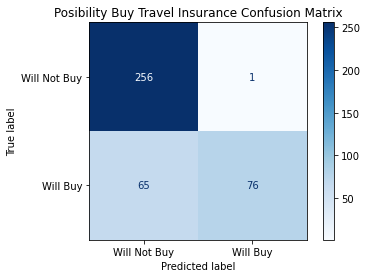

In [137]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

### Balancing

In [138]:
def eval_classification_under(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_under_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_under_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_under_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_under_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_under_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_under_train, y_under_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_over(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_over_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_over_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_over_train, y_over_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_smote(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_smote_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_smote_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_smote_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_smote_train, y_pred_train,pos_label=0)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_smote_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_smote_train, y_smote_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy

In [139]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
rus = RandomUnderSampler(random_state = 42)
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

#### Undersampling

In [140]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=42)
model.fit(X_under_train, y_under_train)
eval_classification_under(model)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.74
Recall (Test Set): 0.63
Specificity (Test Set): 0.88
Avg. Recall (Test Set): 0.76
Avg. Recall (Train Set): 0.76
F1-Score (Test Set): 0.68
AUC (test-proba): 0.81
AUC (train-proba): 0.82
Train score: 0.7574692442882249
Test score:0.7914572864321608


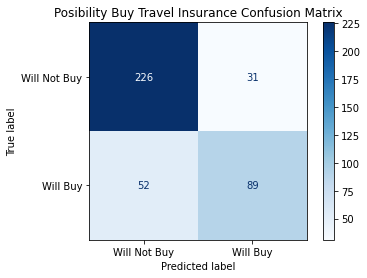

In [141]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### Oversampling

In [142]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, algorithm='SAMME.R', random_state=42)
model.fit(X_over_train, y_over_train)
eval_classification_over(model)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.78
Recall (Test Set): 0.62
Specificity (Test Set): 0.90
Avg. Recall (Test Set): 0.76
Avg. Recall (Train Set): 0.76
F1-Score (Test Set): 0.69
AUC (test-proba): 0.81
AUC (train-proba): 0.82
Train score: 0.7573529411764706
Test score:0.8015075376884422


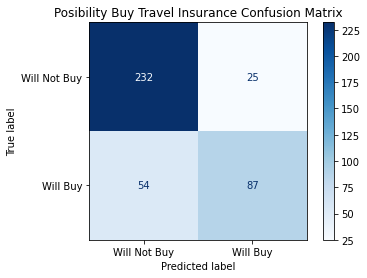

In [143]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### SMOTE

In [144]:
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=42)
model.fit(X_smote_train, y_smote_train)
eval_classification_smote(model)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.84
Recall (Test Set): 0.60
Specificity (Test Set): 0.94
Avg. Recall (Test Set): 0.77
Avg. Recall (Train Set): 0.80
F1-Score (Test Set): 0.70
AUC (test-proba): 0.81
AUC (train-proba): 0.85
Train score: 0.7980392156862746
Test score:0.8165829145728644


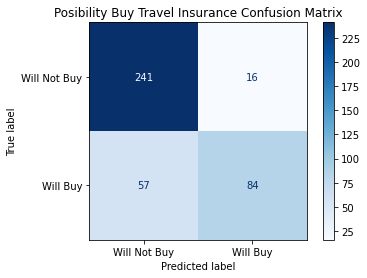

In [145]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

## XGBoost Classifier

In [146]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

### Baseline

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_train, y_pred_train,pos_label=0)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    # print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
    print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [148]:
model = XGBClassifier(tree_method="approx", enable_categorical=True,random_state=42)
model.fit(X_train, y_train)
eval_classification(model)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.83
Recall (Test Set): 0.64
Specificity (Test Set): 0.93
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.87
F1-Score (Test Set): 0.72
AUC (test-proba): 0.81
AUC (train-proba): 0.96
Train score: 0.8980490874764002
Test score:0.8266331658291457


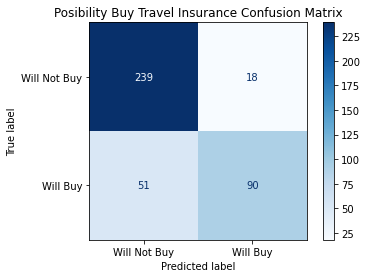

In [149]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

##### Hyperparameter Tuning

In [150]:
clf = XGBClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [151]:
params = {'alpha': (0.1, 10), 'max_depth': (2, 10), 'learning_rate': (0.1, 1)}

clf = GridSearchCV(clf, scoring='precision', cv=cv, param_grid=params)
clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     inte...
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [152]:
model = clf.best_estimator_
eval_classification(model)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.99
Recall (Test Set): 0.57
Specificity (Test Set): 1.00
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.78
F1-Score (Test Set): 0.72
AUC (test-proba): 0.80
AUC (train-proba): 0.83
Train score: 0.8351164254247955
Test score:0.8442211055276382


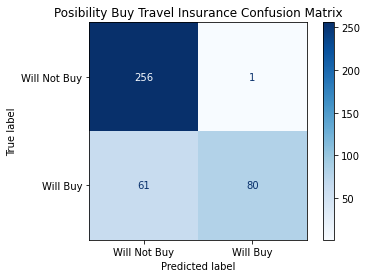

In [153]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

### Balancing

In [154]:
def eval_classification_under(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_under_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_under_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_under_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_under_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_under_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_under_train, y_under_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_over(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_over_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_over_train, y_pred_train,pos_label=0)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_over_train, y_over_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
    
def eval_classification_smote(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_smote_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_smote_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_smote_train, y_pred_train)
    spec_test = recall_score(y_test, y_pred,pos_label=0)
    spec_train = recall_score(y_smote_train, y_pred_train,pos_label=0)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Specificity (Test Set): %.2f" % recall_score(y_test, y_pred,pos_label=0))
    print("Avg. Recall (Test Set): %.2f" % ((recall_test+spec_test)/2))
    print("Avg. Recall (Train Set): %.2f" % ((recall_train+spec_train)/2))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_smote_train, y_pred_proba_train[:, 1]))
    print('Train score: ' + str(model.score(X_smote_train, y_smote_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy

In [155]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
rus = RandomUnderSampler(random_state = 42)
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

#### Undersampling

In [156]:
model = XGBClassifier(tree_method="approx", enable_categorical=True,random_state=42)
model.fit(X_under_train, y_under_train)
eval_classification_under(model)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.67
Recall (Test Set): 0.67
Specificity (Test Set): 0.82
Avg. Recall (Test Set): 0.75
Avg. Recall (Train Set): 0.91
F1-Score (Test Set): 0.67
AUC (test-proba): 0.80
AUC (train-proba): 0.97
Train score: 0.9059753954305799
Test score:0.7663316582914573


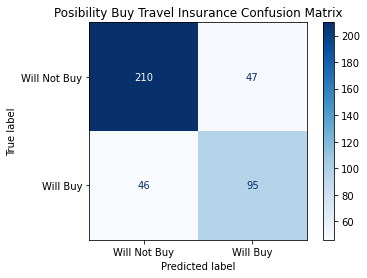

In [157]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

##### hyperparameter Tuning

In [158]:
clf = XGBClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [159]:
params = {'alpha': (0.1, 10), 'max_depth': (2, 10), 'learning_rate': (0.1, 1)}

clf = GridSearchCV(clf, scoring='precision', cv=cv, param_grid=params)
clf.fit(X_under_train, y_under_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     inte...
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [160]:
model = clf.best_estimator_
eval_classification_under(model)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.98
Recall (Test Set): 0.57
Specificity (Test Set): 0.99
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.78
F1-Score (Test Set): 0.72
AUC (test-proba): 0.80
AUC (train-proba): 0.84
Train score: 0.7838312829525483
Test score:0.8417085427135679


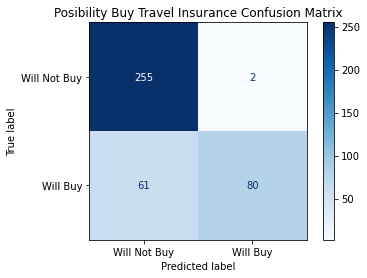

In [161]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### Oversampling

In [164]:
model = XGBClassifier(tree_method="approx", enable_categorical=True,random_state=42)
model.fit(X_over_train, y_over_train)
eval_classification_over(model)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.71
Recall (Test Set): 0.65
Specificity (Test Set): 0.86
Avg. Recall (Test Set): 0.75
Avg. Recall (Train Set): 0.91
F1-Score (Test Set): 0.68
AUC (test-proba): 0.80
AUC (train-proba): 0.97
Train score: 0.9053921568627451
Test score:0.7839195979899497


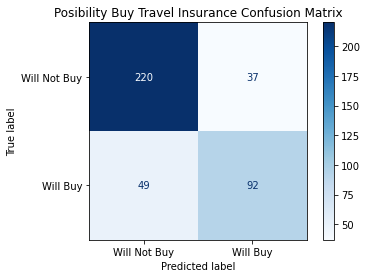

In [165]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

##### Hyperparameter Tuning

In [166]:
clf = XGBClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [167]:
params = {'alpha': (0.1, 10), 'max_depth': (2, 10), 'learning_rate': (0.1, 1)}

clf = GridSearchCV(clf, scoring='precision', cv=cv, param_grid=params)
clf.fit(X_over_train, y_over_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     inte...
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [168]:
model = clf.best_estimator_
eval_classification_over(model)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.98
Recall (Test Set): 0.57
Specificity (Test Set): 0.99
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.78
F1-Score (Test Set): 0.72
AUC (test-proba): 0.80
AUC (train-proba): 0.84
Train score: 0.7833333333333333
Test score:0.8417085427135679


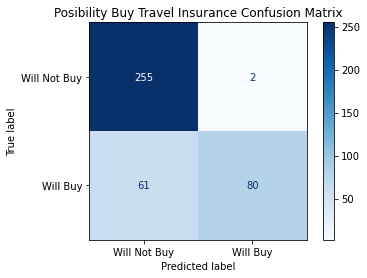

In [169]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

#### SMOTE

In [170]:
model = XGBClassifier(tree_method="approx", enable_categorical=True,random_state=42)
model.fit(X_smote_train, y_smote_train)
eval_classification_smote(model)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.76
Recall (Test Set): 0.65
Specificity (Test Set): 0.89
Avg. Recall (Test Set): 0.77
Avg. Recall (Train Set): 0.92
F1-Score (Test Set): 0.70
AUC (test-proba): 0.80
AUC (train-proba): 0.98
Train score: 0.921078431372549
Test score:0.8040201005025126


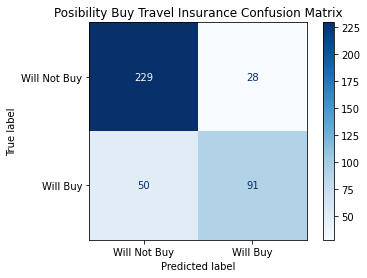

In [171]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

##### Hyperparameter Tuning

In [172]:
clf = XGBClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [173]:
params = {'alpha': (0.1, 10), 'max_depth': (2, 10), 'learning_rate': (0.1, 1)}
clf = GridSearchCV(clf, scoring='precision', cv=cv, param_grid=params)
clf.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     inte...
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [174]:
model = clf.best_estimator_
eval_classification_smote(model)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.98
Recall (Test Set): 0.57
Specificity (Test Set): 0.99
Avg. Recall (Test Set): 0.78
Avg. Recall (Train Set): 0.82
F1-Score (Test Set): 0.72
AUC (test-proba): 0.80
AUC (train-proba): 0.88
Train score: 0.8181372549019608
Test score:0.8417085427135679
